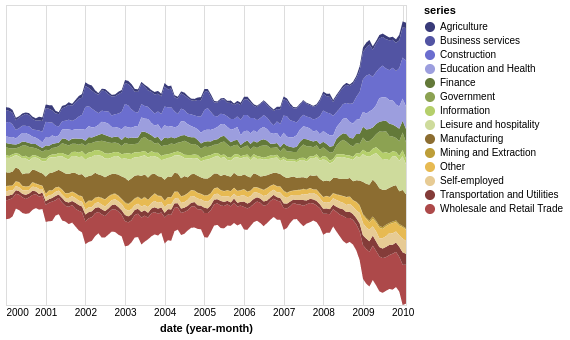

In [9]:
import altair as alt
from vega_datasets import data

source = data.unemployment_across_industries.url

alt.Chart(source).mark_area().encode(
    alt.X('yearmonth(date):T',
        axis=alt.Axis(format='%Y', domain=False, tickSize=0)
    ),
    alt.Y('sum(count):Q', stack='center', axis=None),
    alt.Color('series:N',
        scale=alt.Scale(scheme='category20b')
    )
).interactive()

In [12]:
import pandas as pd
pd.read_json(source).head()

,count,date,month,rate,series,year
0,430,2000-01-01 08:00:00,1,2.1,Government,2000
1,409,2000-02-01 08:00:00,2,2.0,Government,2000
2,311,2000-03-01 08:00:00,3,1.5,Government,2000
3,269,2000-04-01 08:00:00,4,1.3,Government,2000
4,370,2000-05-01 07:00:00,5,1.9,Government,2000


In [4]:
ibge = pd.read_csv("ibge.txt")

In [5]:
ibge

,Ano,Total,Recife,Salvador,BeloHorizonte,Rio,SP,POA
0,2003,1763.85,1262.01,1355.62,1521.68,1758.51,1983.07,1666.88
1,2004,1742.20,1230.58,1327.87,1518.37,1738.16,1951.89,1677.38
2,2005,1769.78,1270.06,1352.68,1552.80,1775.68,1976.09,1656.98
3,2006,1840.64,1330.14,1425.92,1614.77,1824.23,2076.28,1712.25
4,2007,1900.03,1365.58,1462.32,1673.32,1929.99,2114.40,1784.60
5,2008,1964.86,1346.69,1560.36,1750.32,2031.16,2164.35,1829.55
6,2009,2027.95,1332.60,1614.14,1821.93,2096.72,2232.67,1912.80
7,2010,2103.25,1493.40,1686.57,1924.35,2242.75,2242.22,2038.51
8,2011,2159.64,1528.03,1773.94,2010.46,2353.05,2257.45,2091.63
9,2012,2248.40,1644.44,1823.53,2166.51,2375.25,2377.06,2144.46


In [30]:
idades = pd.melt(pd.read_excel("idades.xlsx"), id_vars=["Year"])
idades["Year"] = pd.to_datetime(idades["Year"], format="%Y")
#idades["variable"] = pd.to_numeric(idades["variable"].replace("100+", "100").replace("80+", "80").str.split("-", expand=True)[0])
idades

,Year,variable,value
0,1950-01-01,0-4,338387
1,1955-01-01,0-4,405612
2,1960-01-01,0-4,432643
3,1965-01-01,0-4,480601
4,1970-01-01,0-4,523701
5,1975-01-01,0-4,543302
6,1980-01-01,0-4,548179
7,1985-01-01,0-4,592792
8,1990-01-01,0-4,644867
9,1995-01-01,0-4,623061


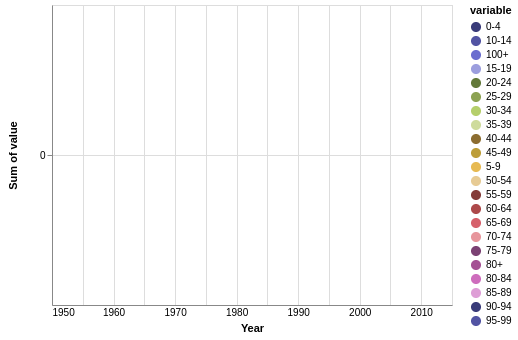

In [31]:
alt.Chart(idades).mark_area().encode(
    alt.X('Year:T',
        axis=alt.Axis(format='%Y', tickSize=0)
    ),
    alt.Y('sum(value):Q', stack='center'),
    alt.Color('variable:N',
        scale=alt.Scale(scheme='category20b')
    )
).interactive()

In [131]:
idades = pd.melt(pd.read_excel("idades_desenvolvidos.xlsx"), id_vars=["Year"])
idades["Year"] = pd.to_datetime(idades["Year"], format="%Y")
idades["variable"] = pd.to_numeric(idades["variable"].replace("100+", "100").replace("80+", "80").str.split("-", expand=True)[0])

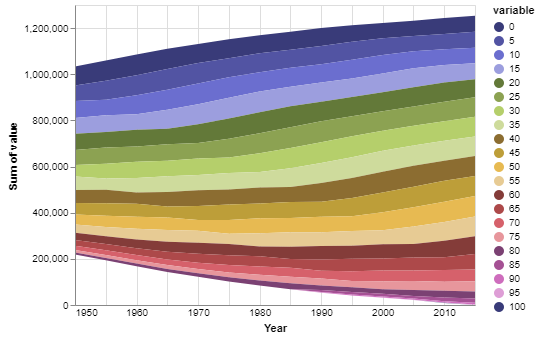

In [132]:
alt.Chart(idades).mark_area().encode(
    alt.X('Year:T',
        axis=alt.Axis(format='%Y', tickSize=0)
    ),
    alt.Y('sum(value):Q', stack='center'),
    alt.Color('variable:N',
        scale=alt.Scale(scheme='category20b')
    )
).interactive()

In [16]:
idades = (pd.read_csv("UN-population-projection-medium-variant.csv"))
idades = idades.loc[idades["Year"] != 2015]
idades["Year"] = pd.to_datetime(idades["Year"], format="%Y")
idades["Total"] = idades[["Estimates, 1950 - 2015: Total population by broad age group, both sexes combined (thousands) - Total", "Projection"]].fillna(0).sum(axis=1)

In [17]:
idades = pd.melt(pd.read_excel("idades_menos_desenvolvidos.xlsx"), id_vars=["Year"]).sort_values("variable")
idades["Year"] = pd.to_datetime(idades["Year"], format="%Y")
idades["variable"] = pd.to_numeric(idades["variable"].replace("100+", "100").replace("80+", "80").str.split("-", expand=True)[0])
idades.head()

,Year,variable,value
0,1950-01-01,0,32570.9
13,2015-01-01,0,140770
11,2005-01-01,0,120633
10,2000-01-01,0,109231
9,1995-01-01,0,98495.9


In [18]:

idades.head()

,Year,variable,value
0,1950-01-01,0,32570.9
13,2015-01-01,0,140770
11,2005-01-01,0,120633
10,2000-01-01,0,109231
9,1995-01-01,0,98495.9


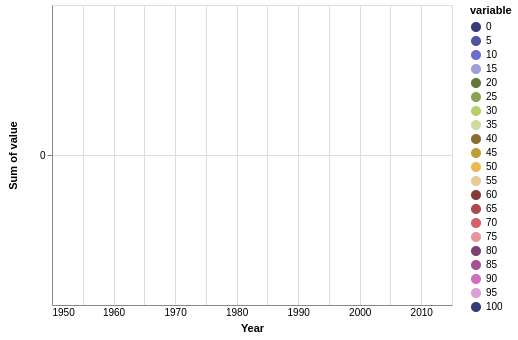

In [19]:
alt.Chart(idades).mark_area().encode(
    alt.X('Year:T',
        axis=alt.Axis(format='%Y', tickSize=0)
    ),
    alt.Y('sum(value):Q', stack='center'),
    alt.Color('variable:N',
        scale=alt.Scale(scheme='category20b')
    )
).interactive()

In [20]:
ibge["Ano"] = pd.to_datetime(ibge['Ano'], format='%Y')

In [21]:
ibge_edited = pd.melt(ibge, id_vars=["Ano"])

In [22]:
ibge_edited

,Ano,variable,value
0,2003-01-01,Total,1763.85
1,2004-01-01,Total,1742.20
2,2005-01-01,Total,1769.78
3,2006-01-01,Total,1840.64
4,2007-01-01,Total,1900.03
5,2008-01-01,Total,1964.86
6,2009-01-01,Total,2027.95
7,2010-01-01,Total,2103.25
8,2011-01-01,Total,2159.64
9,2012-01-01,Total,2248.40


In [23]:
pd.read_csv("multiTimeline.csv").columns

Index(['Semana', 'world cup', 'olympic games', 'super bowl'], dtype='object')

In [24]:
trends = pd.melt(pd.read_csv("multiTimeline.csv"), id_vars=["Semana"])

In [29]:
trends

,Semana,variable,value
0,2014-03-30,world cup,3.0
1,2014-04-06,world cup,2.0
2,2014-04-13,world cup,2.0
3,2014-04-20,world cup,2.0
4,2014-04-27,world cup,2.0
5,2014-05-04,world cup,2.0
6,2014-05-11,world cup,4.0
7,2014-05-18,world cup,4.0
8,2014-05-25,world cup,6.0
9,2014-06-01,world cup,10.0


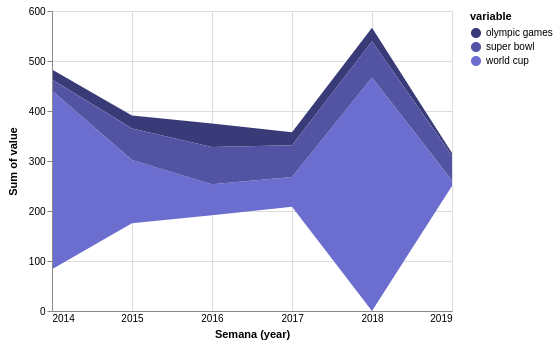

In [26]:
alt.Chart(trends).mark_area().encode(
    alt.X('year(Semana):T',
        axis=alt.Axis(format='%Y', tickSize=0)
    ),
    alt.Y('sum(value):Q', stack='center'),
    alt.Color('variable:N',
        scale=alt.Scale(scheme='category20b')
    )
).interactive()

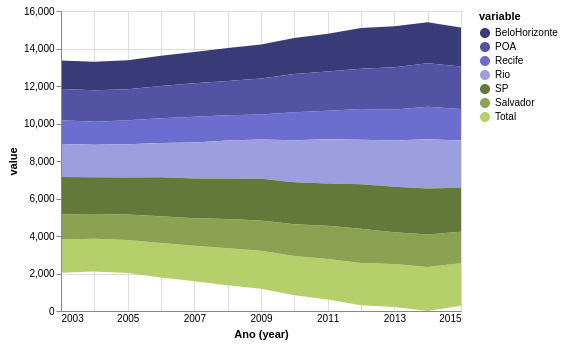

In [27]:
alt.Chart(ibge_edited).mark_area().encode(
    alt.X('year(Ano):T',
        axis=alt.Axis(format='%Y', tickSize=0)
    ),
    alt.Y('value:Q', stack='center'),
    alt.Color('variable:N',
        scale=alt.Scale(scheme='category20b')
    )
).interactive()

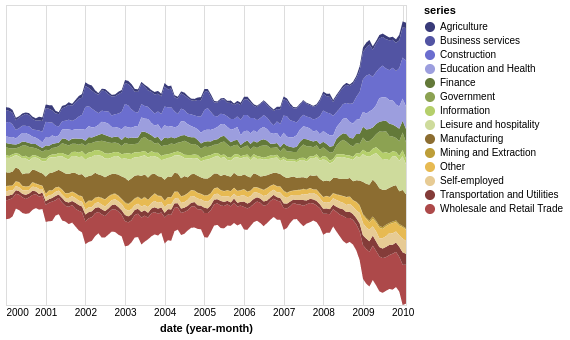

In [28]:
import altair as alt
from vega_datasets import data

source = data.unemployment_across_industries.url

alt.Chart(source).mark_area().encode(
    alt.X('yearmonth(date):T',
        axis=alt.Axis(format='%Y', domain=False, tickSize=0)
    ),
    alt.Y('sum(count):Q', stack='center', axis=None),
    alt.Color('series:N',
        scale=alt.Scale(scheme='category20b')
    )
).interactive()

In [2]:
!pip install -U altair vega_datasets 

    100% |████████████████████████████████| 399kB 14.9MB/s 
    100% |████████████████████████████████| 215kB 22.4MB/s 
  Found existing installation: altair 2.3.0
    Uninstalling altair-2.3.0:
      Successfully uninstalled altair-2.3.0
